/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


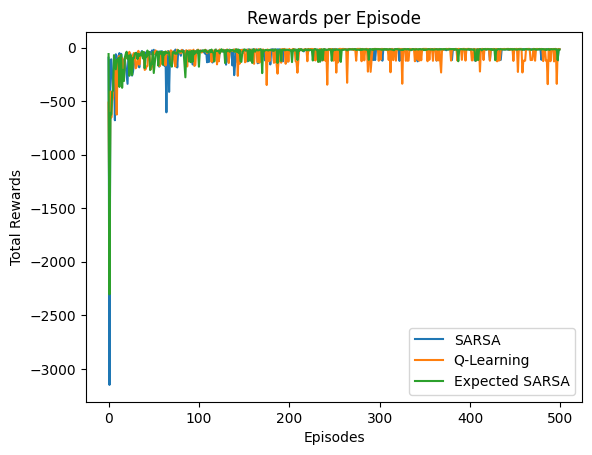

SARSA Policy:
 [['→' '→' '→' '→' '→' '→' '→' '→' '→' '↓' '→' '↓']
 ['→' '→' '→' '→' '→' '→' '→' '→' '→' '→' '→' '↓']
 ['↑' '←' '←' '↑' '←' '←' '←' '→' '→' '→' '→' '↓']
 ['↑' '↑' '↑' '↑' '↑' '↑' '↑' '↑' '↑' '↑' '↑' '↑']]
Q-Learning Policy:
 [['→' '→' '↑' '→' '↑' '↑' '↓' '→' '→' '→' '↑' '↓']
 ['→' '↓' '↑' '→' '→' '→' '→' '→' '→' '→' '→' '↓']
 ['→' '→' '→' '→' '→' '→' '→' '→' '→' '→' '→' '↓']
 ['↑' '↑' '↑' '↑' '↑' '↑' '↑' '↑' '↑' '↑' '↑' '↑']]
Expected SARSA Policy:
 [['↑' '↓' '→' '→' '→' '→' '→' '→' '↓' '→' '→' '↓']
 ['→' '→' '→' '→' '→' '→' '→' '→' '→' '→' '→' '↓']
 ['↑' '↑' '←' '→' '→' '←' '↑' '↑' '↑' '→' '→' '↓']
 ['↑' '↑' '↑' '↑' '↑' '↑' '↑' '↑' '↑' '↑' '↑' '↑']]


In [1]:
import gym
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt

# Initialize the environment
env = gym.make('CliffWalking-v0')

# Function to create epsilon-greedy policy
def epsilon_greedy_policy(Q, state, nA, epsilon):
    policy = np.ones(nA) * epsilon / nA
    best_action = np.argmax(Q[state])
    policy[best_action] += (1.0 - epsilon)
    return policy

# SARSA implementation
def sarsa(env, num_episodes, alpha, gamma=1.0, epsilon=0.1):
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    rewards_per_episode = []

    for i_episode in range(1, num_episodes + 1):
        state = env.reset()
        action = np.random.choice(np.arange(env.action_space.n), p=epsilon_greedy_policy(Q, state, env.action_space.n, epsilon))
        total_rewards = 0

        while True:
            next_state, reward, done, _ = env.step(action)
            next_action = np.random.choice(np.arange(env.action_space.n), p=epsilon_greedy_policy(Q, next_state, env.action_space.n, epsilon))

            Q[state][action] += alpha * (reward + gamma * Q[next_state][next_action] - Q[state][action])

            state, action = next_state, next_action
            total_rewards += reward
            if done:
                break

        rewards_per_episode.append(total_rewards)

    return Q, rewards_per_episode

# Q-Learning implementation
def q_learning(env, num_episodes, alpha, gamma=1.0, epsilon=0.1):
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    rewards_per_episode = []

    for i_episode in range(1, num_episodes + 1):
        state = env.reset()
        total_rewards = 0

        while True:
            action = np.random.choice(np.arange(env.action_space.n), p=epsilon_greedy_policy(Q, state, env.action_space.n, epsilon))
            next_state, reward, done, _ = env.step(action)

            Q[state][action] += alpha * (reward + gamma * np.max(Q[next_state]) - Q[state][action])

            state = next_state
            total_rewards += reward
            if done:
                break

        rewards_per_episode.append(total_rewards)

    return Q, rewards_per_episode

# Expected SARSA implementation
def expected_sarsa(env, num_episodes, alpha, gamma=1.0, epsilon=0.1):
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    rewards_per_episode = []

    for i_episode in range(1, num_episodes + 1):
        state = env.reset()
        total_rewards = 0

        while True:
            action = np.random.choice(np.arange(env.action_space.n), p=epsilon_greedy_policy(Q, state, env.action_space.n, epsilon))
            next_state, reward, done, _ = env.step(action)

            next_policy = epsilon_greedy_policy(Q, next_state, env.action_space.n, epsilon)
            expected_value = np.dot(next_policy, Q[next_state])

            Q[state][action] += alpha * (reward + gamma * expected_value - Q[state][action])

            state = next_state
            total_rewards += reward
            if done:
                break

        rewards_per_episode.append(total_rewards)

    return Q, rewards_per_episode

# Function to plot results
def plot_rewards(rewards_sarsa, rewards_qlearning, rewards_expsarsa):
    plt.plot(rewards_sarsa, label="SARSA")
    plt.plot(rewards_qlearning, label="Q-Learning")
    plt.plot(rewards_expsarsa, label="Expected SARSA")
    plt.xlabel("Episodes")
    plt.ylabel("Total Rewards")
    plt.title("Rewards per Episode")
    plt.legend()
    plt.show()

# Run the algorithms
num_episodes = 500
alpha = 0.1
gamma = 1.0
epsilon = 0.1

Q_sarsa, rewards_sarsa = sarsa(env, num_episodes, alpha, gamma, epsilon)
Q_qlearning, rewards_qlearning = q_learning(env, num_episodes, alpha, gamma, epsilon)
Q_expsarsa, rewards_expsarsa = expected_sarsa(env, num_episodes, alpha, gamma, epsilon)

# Plot rewards
plot_rewards(rewards_sarsa, rewards_qlearning, rewards_expsarsa)

# Visualize the learned policies
def visualize_policy(Q):
    policy = np.zeros((4, 12), dtype=int)
    for state in range(48):
        policy[state // 12, state % 12] = np.argmax(Q[state])
    return policy

policy_sarsa = visualize_policy(Q_sarsa)
policy_qlearning = visualize_policy(Q_qlearning)
policy_expsarsa = visualize_policy(Q_expsarsa)

def plot_policy(policy, title):
    actions = ["↑", "→", "↓", "←"]
    policy_grid = np.array([[actions[action] for action in row] for row in policy])
    print(f"{title} Policy:\n", policy_grid)

plot_policy(policy_sarsa, "SARSA")
plot_policy(policy_qlearning, "Q-Learning")
plot_policy(policy_expsarsa, "Expected SARSA")
